In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/combined_data_ENGHIN.csv')

In [4]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [5]:
df.dropna(inplace = True)

In [6]:
df['text'].fillna('', inplace=True)

In [7]:
import re
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        text = ' '.join(text.split())
        return text
    else:
        return ''

In [8]:
df['text'] = df['text'].apply(lambda x: clean_text(x))

In [9]:
x = df['text']
y = df['label']

In [10]:
from sklearn.model_selection import train_test_split

# Define the proportions for train, validation, and test sets
train_size = 0.7  # 70% of the data for training
validation_size = 0.15  # 15% for validation
test_size = 0.15  # 15% for testing

# First, split the data into training and the rest
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=1 - train_size, random_state=42)

# Next, split the remaining data into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=test_size / (test_size + validation_size), random_state=42)

# The data is now split into X_train, y_train (training), X_val, y_val (validation), and X_test, y_test (test)


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [12]:
tokenizer =Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(x_train)

In [13]:
x_train_after = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen = 800)
x_val_after = pad_sequences(tokenizer.texts_to_sequences(x_val), maxlen = 800)
x_test_after = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen = 800)

In [14]:
from keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from keras.models import Sequential

In [15]:
model = Sequential([
    Embedding(input_dim = 20000, output_dim = 200, input_length = 800),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128, return_sequences = True)),
    Bidirectional(LSTM(64, return_sequences = True)),
    GlobalMaxPooling1D(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 200)          4000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 800, 200)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 800, 256)          336896    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 800, 128)          164352    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                        

In [17]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
history = model.fit(x_train_after, y_train, batch_size = 50, epochs = 11, validation_data = (x_val_after, y_val))

Epoch 1/11
1033/1033 [==============================] - 311s 284ms/step - loss: 0.1650 - accuracy: 0.9304 - val_loss: 0.0746 - val_accuracy: 0.9730
Epoch 2/11
1033/1033 [==============================] - 205s 198ms/step - loss: 0.0413 - accuracy: 0.9861 - val_loss: 0.0626 - val_accuracy: 0.9785
Epoch 3/11
1033/1033 [==============================] - 180s 174ms/step - loss: 0.0202 - accuracy: 0.9930 - val_loss: 0.0851 - val_accuracy: 0.9750
Epoch 4/11
1033/1033 [==============================] - 167s 162ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0943 - val_accuracy: 0.9757
Epoch 5/11
1033/1033 [==============================] - 158s 153ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0828 - val_accuracy: 0.9793
Epoch 6/11
1033/1033 [==============================] - 156s 151ms/step - loss: 0.0105 - accuracy: 0.9961 - val_loss: 0.1184 - val_accuracy: 0.9708
Epoch 7/11
1033/1033 [==============================] - 158s 153ms/step - loss: 0.0073 - accuracy: 0.9973 - val_

In [ ]:
"""from keras.models import save_model
save_model(model, 'my_lstmFake_model_intern_801.h5')"""

/var/folders/ct/ds6vgzw97bgg3kv8qhppd0c80000gn/T/ipykernel_1994/710905493.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, 'my_lstmFake_model_intern_801.h5')


In [19]:
import pickle

with open('history_801.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
from keras.models import load_model
model = load_model('my_lstmFake_model_intern_801.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_after, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2023-10-19 18:03:54.394966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


346/346 [==============================] - 34s 86ms/step - loss: 0.0956 - accuracy: 0.9802
Test Loss: 0.09563296288251877
Test Accuracy: 0.9802114367485046


In [24]:
predictions = model.predict(x_test_after)


346/346 [==============================] - 16s 42ms/step


In [21]:
import matplotlib.pyplot as plt

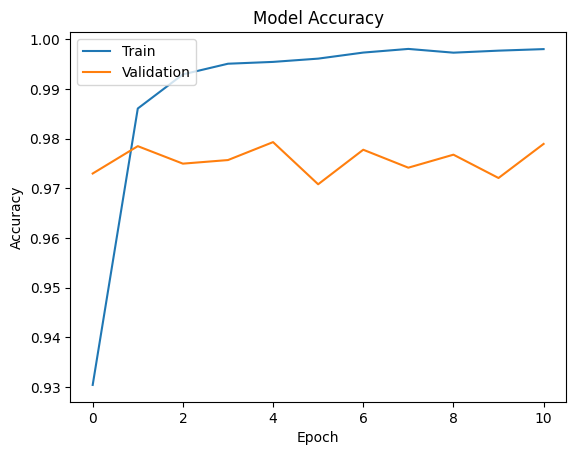

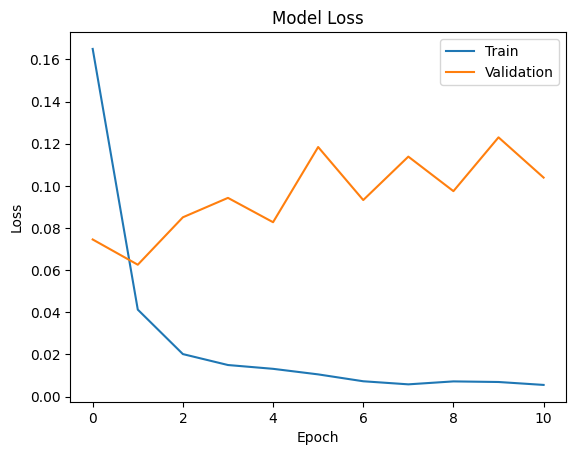

In [22]:
try:
    with open('history_801.pkl', 'rb') as file:
        training_history = pickle.load(file)

    # Plot the accuracy curve
    plt.plot(training_history['accuracy'])
    plt.plot(training_history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot the loss curve
    plt.plot(training_history['loss'])
    plt.plot(training_history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

except FileNotFoundError:
    print("Training history file not found. Make sure you saved it during training.")

In [23]:
from google.colab import files
files.download('history_801.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
predictions

array([[9.9999976e-01],
       [2.3144059e-08],
       [1.0000000e+00],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [2.7744207e-07]], dtype=float32)

In [30]:
threshold = 0.5
lstm_binary_predictions = (predictions >= threshold).astype(int)

In [31]:
lstm_binary_predictions

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

In [33]:
accuracy = accuracy_score(y_test, lstm_binary_predictions)

In [34]:
recall = recall_score(y_test, lstm_binary_predictions)
precision = precision_score(y_test, lstm_binary_predictions)
f1Score = f1_score(y_test, lstm_binary_predictions)

In [36]:
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1Score)

Accuracy:  0.9812053853799584
Precision: 0.9814814814814815
Recall: 0.9811286843997125
F1 Score: 0.98130505123135


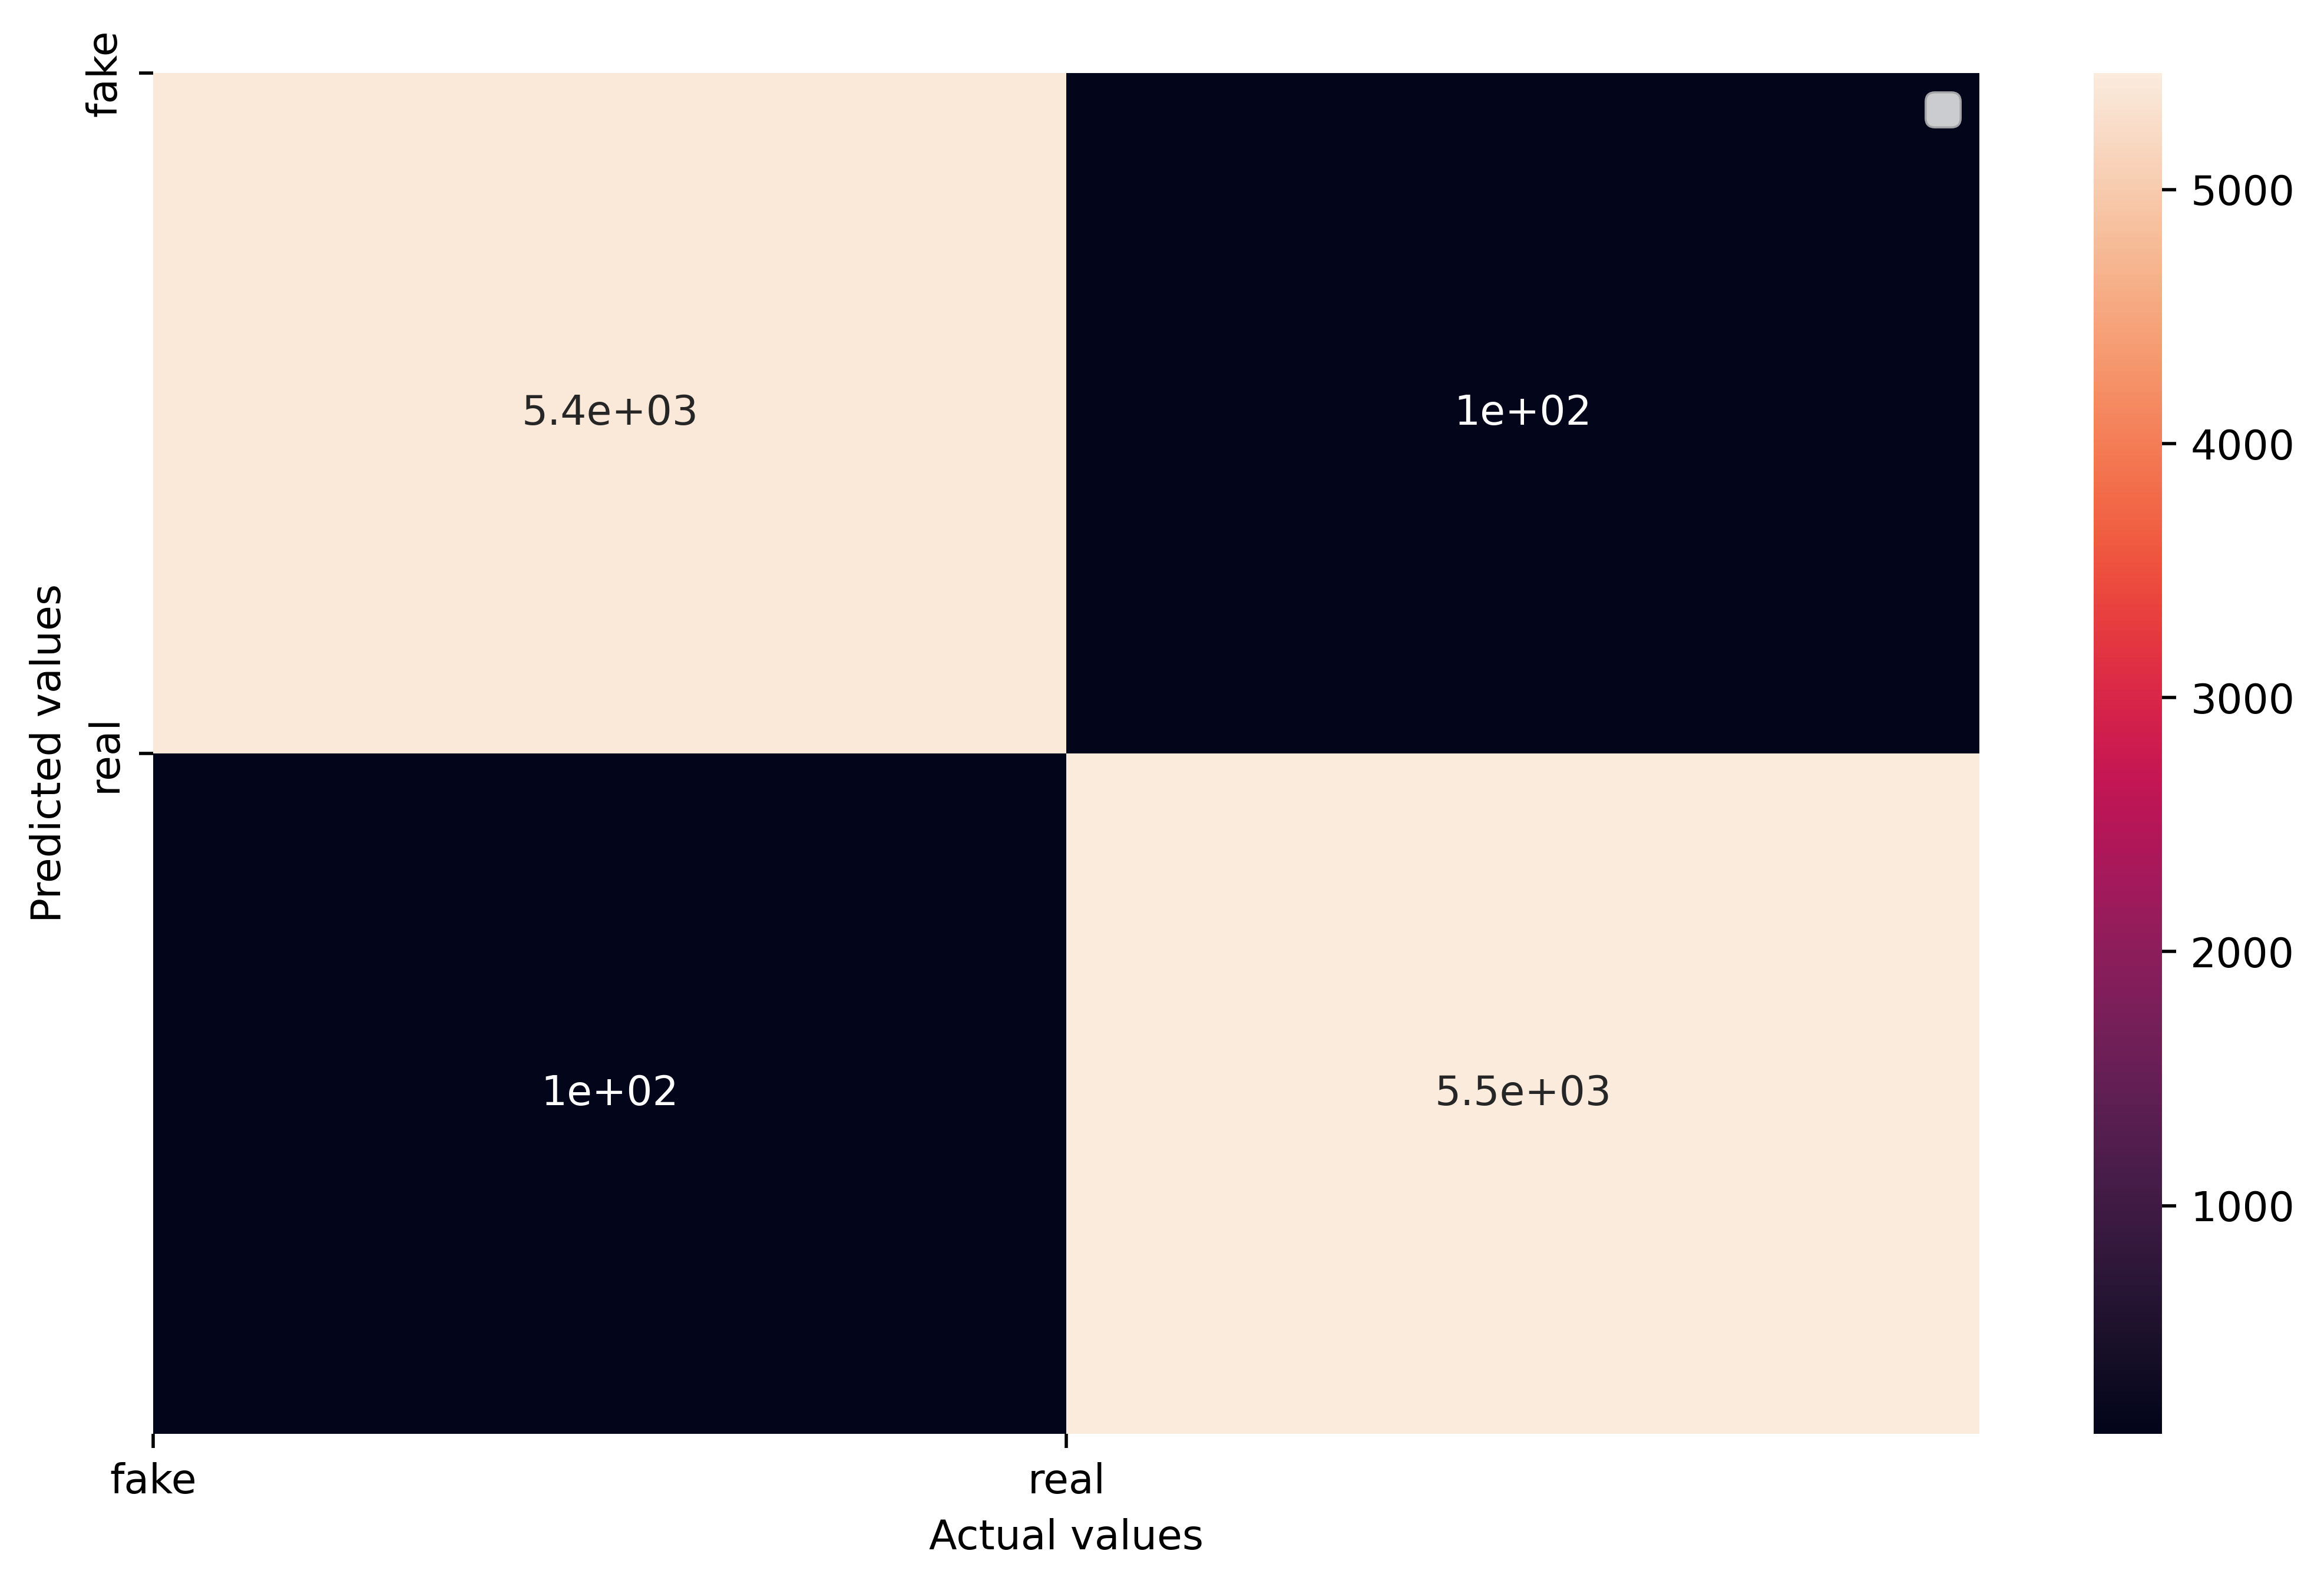

In [37]:
import seaborn as sns
cm_rf = confusion_matrix(y_test, lstm_binary_predictions)
class_names = ['fake', 'real']
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm_rf, annot = True)
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

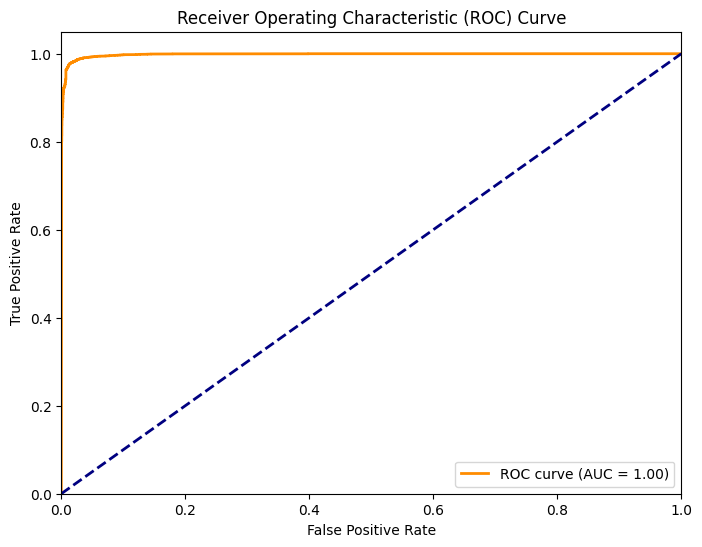

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
